# Data Analysis of Sorted Units (Spikeinterface and Kilosort4)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

First spike latency to stimulus = 5
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 1
10 0
11 1
12 0
13 1
14 0
15 0
16 0
17 1
18 0
19 0
20 0
[9, 11, 13, 17]


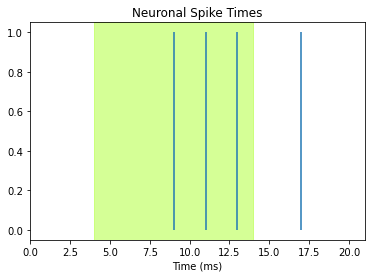

In [4]:
spike_train = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0]

light_onset_time = 4
stimulus_duration = 10
spike_value = 1

latency_to_first_spike = spike_train[light_onset_time:].index(spike_value) 
print('First spike latency to stimulus = ' + str(latency_to_first_spike))

for i, x in enumerate(spike_train):
    print(i, x)
    
spike_times = []
for i, x in enumerate(spike_train):
    if x == spike_value:
        spike_times.append(i)
print(spike_times)

# define light offset time
light_offset_time = light_onset_time + stimulus_duration
fig, ax = plt.subplots()
ax.vlines(spike_times, 0, 1)
ax.set_xlim([0, len(spike_train)])
ax.set_xlabel('Time (ms)')
ax.set_title('Neuronal Spike Times') 
# add shading for stimulus duration)
ax.axvspan(light_onset_time, light_offset_time, alpha=0.5, color='greenyellow')
plt.show()

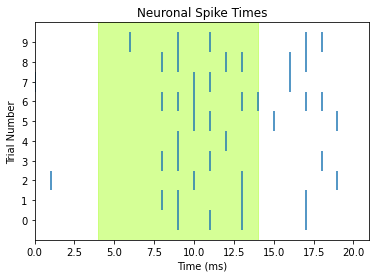

[[0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0]]


numpy.ndarray

In [7]:
ten_spike_trains = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0], 
                    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], 
                    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], 
                    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0], 
                    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0], 
                    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], 
                    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0], 
                    [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0]
                   ]

fig, ax = plt.subplots()
# Loop to plot raster for each trial
for trial in range(len(ten_spike_trains)):
    spike_times = [i for i, x in enumerate(ten_spike_trains[trial]) if x == spike_value]
    ax.vlines(spike_times, trial - 0.5, trial + 0.5)
ax.set_xlim([0, len(spike_train)])
ax.set_xlabel('Time (ms)')
# specify tick marks and label label y axis
ax.set_yticks(range(len(ten_spike_trains)))
ax.set_ylabel('Trial Number')
ax.set_title('Neuronal Spike Times') 
# add shading for stimulus duration)
ax.axvspan(light_onset_time, light_offset_time, alpha=0.5, color='greenyellow')
plt.show()

spike_array = np.array(ten_spike_trains)
print(spike_array)
type(spike_array)

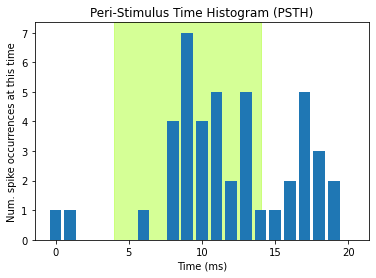

In [8]:
fig, ax = plt.subplots()
# add shading for stimulus duration)
# Do this first, so it's drawn "under" the PSTH
ax.axvspan(light_onset_time, light_offset_time, alpha=0.5, color='greenyellow')

# Draw the PSTH
ax.bar(range(spike_array.shape[1]), 
        np.sum(spike_array, 0)
       )
# Make pretty
ax.set_title('Peri-Stimulus Time Histogram (PSTH)')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Num. spike occurrences at this time')
plt.show()

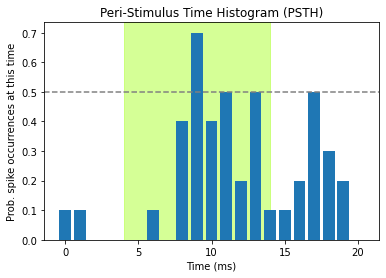

In [9]:
fig, ax = plt.subplots()

# add shading for stimulus duration)
ax.axvspan(light_onset_time, light_offset_time, alpha=0.5, color='greenyellow')
# Draw the PSTH
ax.bar(range(spike_array.shape[1]), 
        np.mean(spike_array, 0)
       )
# Add line showing chance probability of firing
ax.axhline(y=0.5, xmin=0, xmax=20, linestyle='--', color='gray')
# Make pretty
ax.set_title('Peri-Stimulus Time Histogram (PSTH)')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Prob. spike occurrences at this time')
plt.show()

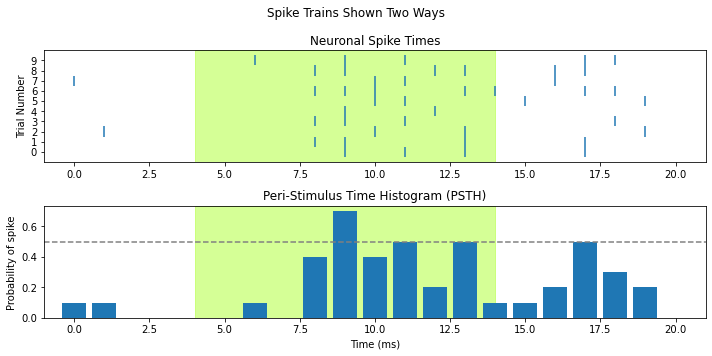

In [12]:
fig, axs = plt.subplots(2, 1, figsize=[10,5])

########################################
# draw raster into first subplot, axs[0]
# add shading for stimulus duration)
axs[0].axvspan(light_onset_time, light_offset_time, alpha=0.5, color='greenyellow')
for trial in range(len(ten_spike_trains)):
    spike_times = [i for i, x in enumerate(ten_spike_trains[trial]) if x == spike_value]
    axs[0].vlines(spike_times, trial - 0.5, trial + 0.5)
# Set x axis range so that time zero is more visible    
axs[0].set_xlim([-1, len(spike_train)])
# specify tick marks and label label y axis
axs[0].set_yticks(range(len(ten_spike_trains)))
axs[0].set_ylabel('Trial Number')

axs[0].set_title('Neuronal Spike Times') 

#######################################
# draw PSTH into second subplot, axs[1]
# add shading for stimulus duration
axs[1].axvspan(light_onset_time, light_offset_time, alpha=0.5, color='greenyellow')
# Draw the PSTH
axs[1].bar(range(spike_array.shape[1]), 
           np.mean(spike_array, 0)
           )
# Use same x axis limits as for raster plot
axs[1].set_xlim([-1, len(spike_train)])
# Add line showing chance probability of firing
axs[1].axhline(y=0.5, xmin=0, xmax=20, linestyle='--', color='gray')
# Make pretty
axs[1].set_title('Peri-Stimulus Time Histogram (PSTH)')
axs[1].set_xlabel('Time (ms)')
axs[1].set_ylabel('Probability of spike')
### Overall figure stuff
fig.suptitle('Spike Trains Shown Two Ways')
plt.tight_layout()
plt.show()

# From google AI

In [ ]:

# Example spike times for a single trial
spike_times = np.array([0.1, 0.2, 0.3, 0.5, 0.7, 0.8])
# Stimulus onset time
stimulus_onset = 0
# Trial duration
trial_duration = 1
# Bin size for the histogram
bin_size = 0.1
# Create bins for the histogram
bins = np.arange(stimulus_onset, trial_duration + bin_size, bin_size)
# Compute the histogram
hist, _ = np.histogram(spike_times, bins)
# Plot the PSTH
plt.bar(bins[:-1], hist, width=bin_size, align='edge')
plt.xlabel('Time (s)')
plt.ylabel('Spike Count')
plt.title('PSTH')
plt.show()

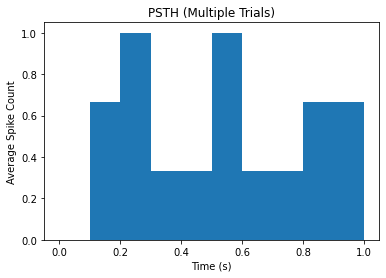

In [11]:
# Example spike times for multiple trials
spike_times_trials = [np.array([0.1, 0.2, 0.3, 0.5, 0.7, 0.8]),
                      np.array([0.2, 0.4, 0.6, 0.8, 0.9]),
                      np.array([0.15, 0.35, 0.55, 0.75, 0.95])]

# Compute the PSTH for multiple trials
hist = np.zeros(len(bins) - 1)
for spike_times in spike_times_trials:
    trial_hist, _ = np.histogram(spike_times, bins)
    hist += trial_hist
# Plot the PSTH
plt.bar(bins[:-1], hist / len(spike_times_trials), width=bin_size, align='edge')
plt.xlabel('Time (s)')
plt.ylabel('Average Spike Count')
plt.title('PSTH (Multiple Trials)')
plt.show()

# With ligh intensities (neuraldatascience)

In [ ]:
stim_on = 4   # time stimulus turned on
stim_off = 14 # time stimulus turned off
num_trials = 10 # number of trials per intensity level
num_tp = 21     # Number of time points in each trial (0-20 ms, inclusive)

spikes = pd.read_csv('data/ten_intensities.csv')

spikes.head()
spikes.sample(25)
spikes.shape
spikes['Intensity'].unique()
spikes['Trial'].unique()
trials = sorted(spikes['Trial'].unique())
# select just data for intensity level 9
dat = spikes[spikes['Intensity'] == 9]

In [ ]:
#raster
fig, ax = plt.subplots()
# Shade time when stimulus was on
ax.axvspan(stim_on, stim_off, alpha=0.5, color='greenyellow')
# Draw the raster one trial at a time
for trial in trials:
    # get spike times for this trial
    spike_times = dat[dat['Trial'] == trial]['SpikeTime']
    # Draw the raster
    ax.vlines(spike_times, 
              trial - 0.4, trial + 0.4)
plt.show()

In [ ]:
#psth
fig, ax = plt.subplots()
# Shade time when stimulus was on
ax.axvspan(stim_on, stim_off, alpha=0.5, color='greenyellow')
ax.hist(dat['SpikeTime'], bins=range(0, num_tp, 1))
plt.show()

In [ ]:
#Combined psth and raster
# # here we hard-code the figure dimensions (x, y) to control the way the plot looks
fig, axs = plt.subplots(1, 2, figsize=[15, 4])
# Shade time when stimulus was on
axs[0].axvspan(stim_on, stim_off, alpha=0.5, color='greenyellow')
# select just data for intensity level 9
dat = spikes[spikes['Intensity'] == 9]
# Draw the raster one trial at a time
for trial in trials:
    # get spike times for this trial
    spike_times = dat[dat['Trial'] == trial]['SpikeTime']
    # Draw the raster
    axs[0].vlines(spike_times, 
              trial - 0.4, trial + 0.4)
# Shade time when stimulus was on
axs[1].axvspan(stim_on, stim_off, alpha=0.5, color='greenyellow')
axs[1].hist(dat['SpikeTime'], bins=range(0, num_tp, 1))
plt.show()

In [ ]:
int_levels = sorted(spikes['Intensity'].unique())

Although there is also a sharey kwarg for the y axis, this isn’t appropriate for the current figure because the raster and PSTH plots necessarily will have different scales. The rasters are already on the same scale, since there were 10 trials at each intensity level. However, note that the y scales for the PSTHs are all different, which makes it very hard to compare between different intensity levels.

In [ ]:
# set the number of subplot rows based on number of intensity levels in data
# specify the figure dimensions since it will need to be a big figure
fig, axs = plt.subplots(len(int_levels), 2, figsize=[12, 12], sharex=True)
y_max = 0 # Accumulator variable
for i in int_levels:
    ## Raster plot
    # select just data for current intensity level
    # this is convenient since we'll refer to this subset of data a few times below
    dat = spikes[spikes['Intensity'] == i]
    # Draw the raster one trial at a time
    for trial in trials:
        # get spike times for this trial
        spike_times = dat[dat['Trial'] == trial]['SpikeTime']
        # Draw the raster
        axs[i, 0].vlines(spike_times, 
                         trial - 0.4, trial + 0.4)
    # Shade time when stimulus was on
    axs[i, 0].axvspan(stim_on, stim_off, 
                      alpha= i / 10 + .1,       # Base intensity of shading (alpha) on intensity level
                      color='greenyellow')
    # Label the y axis with intensity level
    axs[i, 0].set_ylabel('Intensity  ' + str(i))
    # place title only above the first row of plots:
    if i == 0:
        axs[i, 0].set_title('Raster Plot for each intensity', fontsize=10)
    ## PSTH
    # Shade time when stimulus was on
    axs[i, 1].axvspan(stim_on, stim_off, 
                      alpha= i / 10 + .1, 
                      color='greenyellow')
    
    # Plot histogram
    axs[i, 1].hist(dat['SpikeTime'], bins=range(0, num_tp, 1))
    # Set the x tickmarks to every 2 ms
    axs[i, 1].set_xticks(range(0, num_tp + 1, 2))
    # Label the y axis 
    axs[i, 1].set_ylabel('Num. Spikes')
    # find y max of current plot
    cur_min, cur_max = axs[i, 1].get_ylim()
    # update y_max if necessary
    if cur_max > y_max:
        y_max = cur_max
    # place title only above the first row of plots:
    if i == 0:
        axs[i, 1].set_title('PSTH for each intensity', fontsize=10)
    # Place x label only below bottom row of plots:    
    if i == max(int_levels):
        axs[i, 1].set_xlabel('Time (ms)')
        axs[i, 0].set_xlabel('Time (ms)')

# Having plotted all intensity levels, re-scale y axis to the max we found
# Also apply the same scale to all rasters
for a in int_levels:
    axs[a, 0].set_ylim(0, num_trials)
    axs[a, 1].set_ylim(0, y_max)
# Add an overall figure title
fig.suptitle('Effects of 550 nm light intensity on spike rate of neuron')
    
plt.tight_layout()
plt.show()